\pagebreak
# BEE313 Problem 1.1

## Objective:
We are interested in estimating the groundwater contribution to this basin on an annual basis in mm/year. This basin has an area of 10 km$^2$, 1750 mm annual rainfal, and average annual stream flow of 0.3 m$^3$/sec.

## Methods
We will use mass balance to estimate the groundwater contribution from/to (with +/- signs, respectively) the catchment. The mass balance is:
$$ P - ET - Q - G = \Delta S $$
We assume that at the annual scale $\Delta S$ is zero. We convert all units to [mm/year]. We rewrite the mass balance to sovel for G as
$$ G = P - ET - Q $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Given information
Area = 10 # [km^2]
P = 1750 # [mm/year]
Q = 0.3 # [m^3/sec]
ET = 4 # [mm/day]

# Convert units
Area = Area * 1000 **2 # [m^2]
Q = Q * (60*60*24*365) / Area * 1000 # [mm/year]
ET = ET * (365)

# Do Mass Balance
G = P - ET - Q

# Print answer
print('Groundwater flow =', G, 'mm/year')

Groundwater flow = -656.08 mm/year


## Results:
Based on the mass balance equation, in total, **656 mm/year** of water flows into this watersheds via groudwater on average.

## Discussion:
Though not visible, the contribution of groundwater movements to the total catchment mass is considerable (about 40% of rainfall and ET and 70% of stream flows).

\pagebreak

# BEE313 Problem 1.2

## Objective:
The goal of this problem is to obtain the specific moisture decrease due to temperature reduction when an air parcel moves from Pacific Ocean at Newport to Mary's peak. 

## Methods
The absolute humidity should be calculated at both ends. The rainfall can be obtained as the difference. For this purpose, first the vapor pressure is found from relative humidity and temperature:
$$ e = 611 \ exp(\frac{17.27T }{T+237.3}) $$
The absolute humidity is then calculated using vapor pressure and temperature:
$$ \rho_V = \frac{e}{R_V \ (T+273.15)} $$
Finally, the rainfall is found from air mass thickness and absolute humidity change. The total expected rainfall is given by the difference in vapor density [kg/m3] multiplied by the thickness of the cloud ($h$) and then converted to mm with the density of water ($\rho_W$)
$$ P = (\rho_{V(start)} - \rho_{V(end)})h/\rho_W $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Constants
R_V = 461.5 # [J/kg/K]
rho_W = 1000 # [kg/m^3] water density

# Given information
Temp_0 = 21 # [C]
RH_0 = 65/100 # [%]
Temp_1 = 8 # [C]
AirMassThickness = 2.5*1000 # [m]

# Define function to calcuate eStar
def eStar(Tin): return 611*np.exp((17.27*Tin)/(Tin+237.3))

# Inital absolute humidity in kg/m^3
eStar_0 = eStar(Temp_0)
e_0 = RH_0*eStar_0 
rhoV_0 = e_0/(R_V*(Temp_0+273.15))

# Final absolute humidity in kg/m^3
e_1 = eStar(Temp_1)
rhoV_1 = e_1/(R_V*(Temp_1+273.15))

# Difference in absolute humidty
rhoV_change = rhoV_0 - rhoV_1

# Convert to mm of rainfall
precipitation_mm = rhoV_change * AirMassThickness / rho_W * 1000
print("Water lost from air mass in mm is %.1fmm" % precipitation_mm)

Water lost from air mass in mm is 9.1mm


## Results:
In total, a minimum of **9.1mm** of precipitation is lost from the air mass over this distance.

## Discussion:
If air parcel becomes cooler (here moving to high eleveations), its vapor pressure does not change, but its relative humidity increases. With further cooling, the parcel has reached its saturation vapor pressure and its relative humidity which results in condensation.

\pagebreak

# BEE313 Problem 1.3

## Objective:
We want to calculate the average annual precipitation in mm in a watershed, where a few Gauge measurements have been performed as:

$$ GaugeElevations = [460, 600, 1180] $$
$$ GaugePrecipitation = [715, 750, 895] $$

To evaluate the rainfall, the topographic distribution of this watershed of its area with elevation: 
$$ AreaElevations = [200, 400, 600, 800, 1000, 1200, 1400, 1600] $$
$$ AreaFraction = [0.0, 0.028, 0.159, 0.341, 0.271, 0.151, 0.042, 0.008] $$
Where the *AreaElevations* are the upper end of that area's elevation range. 
 
##  Methods
To solve this problem we'll use the hypsometric method, assuming a linear orographic relation. The first step is to obtain the fitiing function that relates the Gauge Precipitation to Gauge Elevations. This function will then be used to find the actual precipitations based on Area Elevations. In this problem, we used a linear fitted function. The average annual precipitation is finally calculated basd on a weighted average using the area fractions.

Fit coeffs [2.5e-01 6.0e+02]
The basins average precipitation is 800.7999999999997 mm


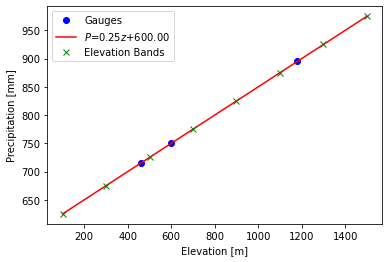

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Basin Area Information
Area_Elevations = np.array([100, 300, 500, 700, 900, 1100, 1300, 1500])
Area_Fraction = np.array([0.0, 0.028, 0.159, 0.341, 0.271, 0.151, 0.042, 0.008])

# Rain gauge data
Gauge_Elevations = np.array([460, 600, 1180])
Gague_Precipitation = np.array([715, 750, 895])

# Fit a line to gague data
fit_coeffs = np.polyfit(Gauge_Elevations, Gague_Precipitation, 1)
print('Fit coeffs',fit_coeffs)

# Predict rainfall at different elevations
Average_Elevations = Area_Elevations # To get average elevation in this range
Average_Precipitation = Average_Elevations*fit_coeffs[0] + fit_coeffs[1]

# Estimate the basin average
Basin_Average = np.sum(Average_Precipitation * Area_Fraction)
print('The basins average precipitation is',Basin_Average, 'mm')

plt.figure(1)
plt.plot(Gauge_Elevations, Gague_Precipitation,'bo',label='Gauges')
plt.plot(Average_Elevations,Average_Precipitation,'r-',label='$P$=%.2f$z$+%.2f'%(fit_coeffs[0], fit_coeffs[1]))
plt.plot(Area_Elevations,Average_Precipitation,'gx',label='Elevation Bands')
plt.xlabel('Elevation [m]'); plt.ylabel('Precipitation [mm]')
plt.legend()

## Results:
The average precipitation in this basin is **801mm**.

## Discussion:
When guages are well distributed throughout a watershed with complex topography, it is important that elevation be taken into account. Here a linear approach is used to estimate relationship between elevation and precipitation, though other posible relations exist.

\pagebreak

# BEE313 Problem 1.4

## Objective:
The objective of this problem is to calculate the 10-year annual rainfall total given a 100 year time series for the city of Corvallis.

##  Methods
The rainfall data is sorted and the non-exceedance probability ($F(x)$) is calculated using 
$$ F(x) = \frac{r}{1+n} $$ 
where $r$ is the rank (smallest to largest) and $n$ is the number of obserations, 99 our case. The return interval is calculated as 
$$ T_R = \frac{1}{1-F(x)} $$

We can find the index of the 10year event by solving the above equations for $r$ given that $T_R$ is 10. Combining the above we have
$$ r = \left(1-\frac{1}{T_R}\right)(1+n) $$
where it is important to note that the the we must convert the rank to an integer subtract 1 from the rank to find the index (since these start at 1 but indexes in python start at 0).

The 10-year annual precipitation total in Corvallis is  1330.55 mm


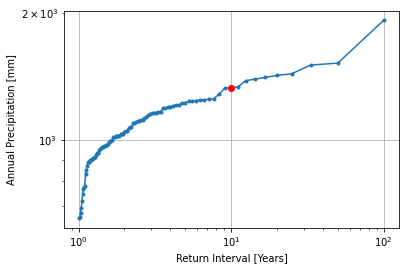

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Given Data
AnnualRainfall = np.array(
    [1021.06,1052.48,1330.55,889.06,1407.20,886.63,1163.28,1168.88,897.59,1249.29,
    993.65,963.82,1240.87,958.52,1144.11,1017.51,1252.29,1074.10,897.10,1284.55,
    1097.71,1105.44,1000.74,933.31,966.33,903.02,1033.65,1206.93,988.68,673.89,
    654.62,1052.87,998.38,1157.67,981.55,718.48,869.52,1505.57,911.09,775.72,
    1118.34,975.42,1132.92,947.14,659.60,1200.15,1033.66,1022.35,1227.38,907.94,
    1435.88,1190.44,778.84,1326.98,1162.43,1246.73,1043.58,1034.07,1116.40,934.84,
    1126.82,1211.50,932.40,1022.74,1188.63,907.78,1015.64,887.22,1393.42,1067.60,
    1224.72,1336.84,1154.76,1238.44,1234.72,1095.73,748.32,1025.56,923.02,1071.70,
    1112.84,1200.78,1209.95,1422.25,1245.29,693.02,1112.20,967.55,970.48,766.32,
    974.69,849.93,833.45,902.90,954.75,1382.77,1918.39,1162.03,1520.63])

# Sorted Precipitation and ranks
N_observations = len(AnnualRainfall)
P_sorted = np.sort(AnnualRainfall)
P_ranks = np.arange(N_observations)+1 # Because these start at zero

# Exceedence Probabilities and Return Intervals With Weibul Plotting
nonExceedenceProbability = P_ranks/(N_observations+1) # F(x)
exceedenceProbability = 1 - nonExceedenceProbability # 1-F(x)
return_interval = 1/exceedenceProbability # 1/(1-F(x))

# Find the rank of the 10 year event (rounding down)
returnPeriodCalculated = 10
rankCalculated = (1-(1/returnPeriodCalculated))*(N_observations+1)
indexCalculated = int(rankCalculated-1)
precipitationCalculated = P_sorted[indexCalculated]
print('The 10-year annual precipitation total in Corvallis is ', precipitationCalculated, 'mm')

# Plot results
plt.figure(2)
plt.plot(return_interval,P_sorted,'.-')
plt.plot(returnPeriodCalculated,precipitationCalculated,'ro' )
plt.ylabel('Annual Precipitation [mm]')
plt.xlabel('Return Interval [Years]')
plt.yscale('log'); plt.xscale('log')
plt.grid('on')



## Results:
Using an interpolation approach the 10-year annual precipitation total is **1331mm**.  

## Discussion:
Engineers are often tasked with designing projects with a specific return interval in, the approach here finds the 10-year annual rainfall amount. As larger return intervals are estimated, the spacing between observations grows and uncertainty becomes larger.